# 시계열분석 ARIMA,SARIMA_montly data 재분석

### *monthly 데이터로 재분석한 이유*
* 주별, 일별, 그리고 일별 이하의 데이터는 여러 가지 다른 이유로 예측하기 어려울 수 있다.

##### **주별 데이터**
주별 데이터는 계절성 주기(1년 전체 주의 개수)가 크면서 정수가 아니라서 어렵다. 1년에 있는 주의 평균 개수는 52.18이다. <br>
1년에 있는 주의 개수를 근사적으로 52로 두어도, 대부분의 기법은 이렇게 큰 계절성 주기를 효과적으로 다루지 못할 것이다.

##### **일별과 일별 이하의 데이터**
여기에는 종종 여러 계절성 패턴이 들어가서 이러한 복잡한 계절성을 다룰 기법을 사용해야 하기 때문.
* 계절성이 충분히 길어서 더 긴 몇몇 계절성 주기가 분명해지면, 동적 조화 회귀나 TBATS를 사용할 필요가 있다.
   하지만, 이러한 모델도 규칙적인 계절성만 허용함. 
* 바뀌는 휴일 효과를 다루는 가장 좋은 방법은 가변수(dummy variable)를 사용하는 것.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# warning 무시
import warnings
warnings.filterwarnings(action='ignore')

In [70]:
# 2015-12-31 ~ 2019-06-30
df_monthly = pd.read_csv('./monthly data.csv')
df_monthly = df_monthly.rename(columns={"Time":"date", "PV":"pv","UV":"uv"})
df_monthly.head()

,date,pv,PV (W/O Noactive),uv,UV (W/O Noactive)
0,2015-12-31,534839600,461432110,18040963,8519434
1,2016-01-31,519828623,450797355,17592750,8436258
2,2016-02-29,467603274,402366321,15816608,7575439
3,2016-03-31,524981334,454427009,17216884,8249748
4,2016-04-30,478457653,412124488,15396712,7411397


In [4]:
df_monthly.shape

(43, 5)

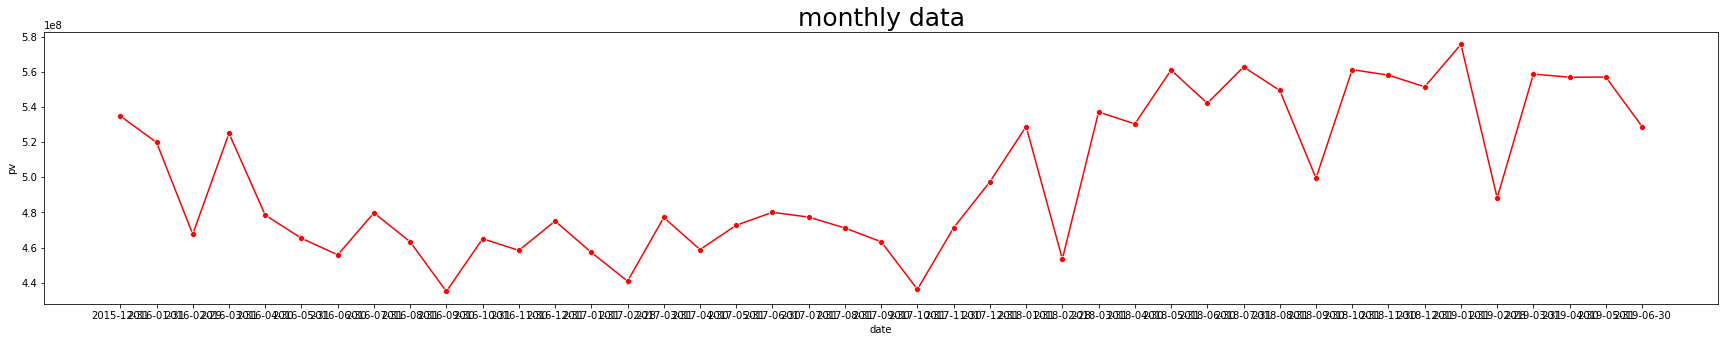

In [67]:
plt.figure(figsize = (30,5))
sns.lineplot(x = "date", y="pv",marker = "o",data = df_monthly, color = 'red')
plt.title("monthly data" , size = 25)
plt.show()

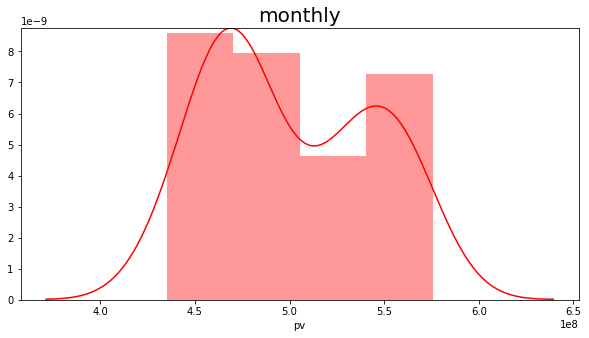

In [68]:
plt.figure(figsize=(10,5))
sns.distplot(df_monthly['pv'],color='red')
plt.title("monthly", size = 20)
plt.show()

## STL Decomposition (Seasonal Trend Decomposition using Loses)

In [108]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 432x288 with 0 Axes>

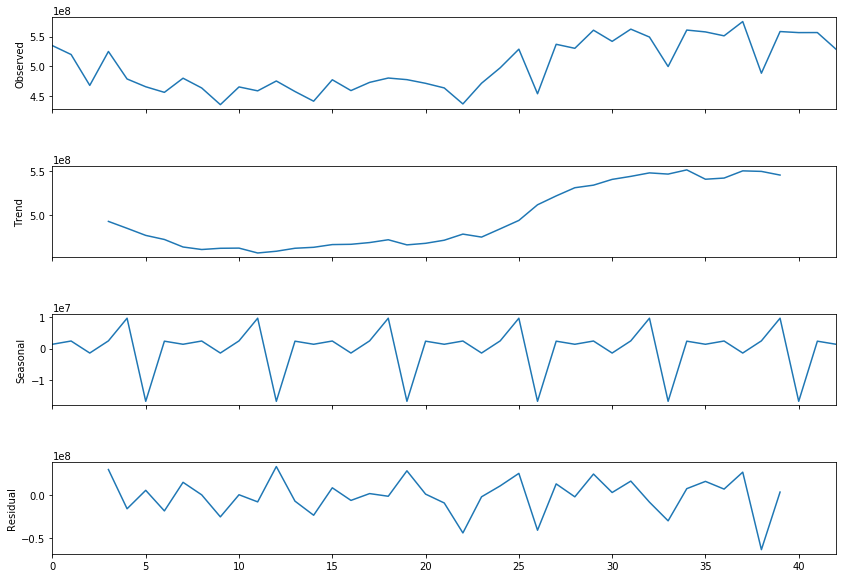

In [118]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_monthly['pv'], freq=7)   # freq값은 주기 
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(13,9)
plt.show()

## 정상성 검정

In [110]:
from statsmodels.tsa.stattools import adfuller

In [119]:
# 정상성 검증 
print( "검정통계량:" ,adfuller(df_monthly['pv'])[0])
print( "p-value:" ,adfuller(df_monthly['pv'])[1])
print( "사용된 시차의 수:" ,adfuller(df_monthly['pv'])[2])
print( "자료의 수:" ,adfuller(df_monthly['pv'])[3])
print( "1%,5%,10%수준에 해당되는 검정통계량의 값:" ,adfuller(df_monthly['pv'])[4])

검정통계량: -1.5519098206297037
p-value: 0.5076940768352618
사용된 시차의 수: 1
자료의 수: 41
1%,5%,10%수준에 해당되는 검정통계량의 값: {'1%': -3.60098336718852, '5%': -2.9351348158036012, '10%': -2.6059629803688282}


## ACF, PACF plot

In [5]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

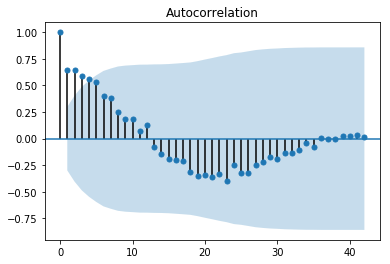

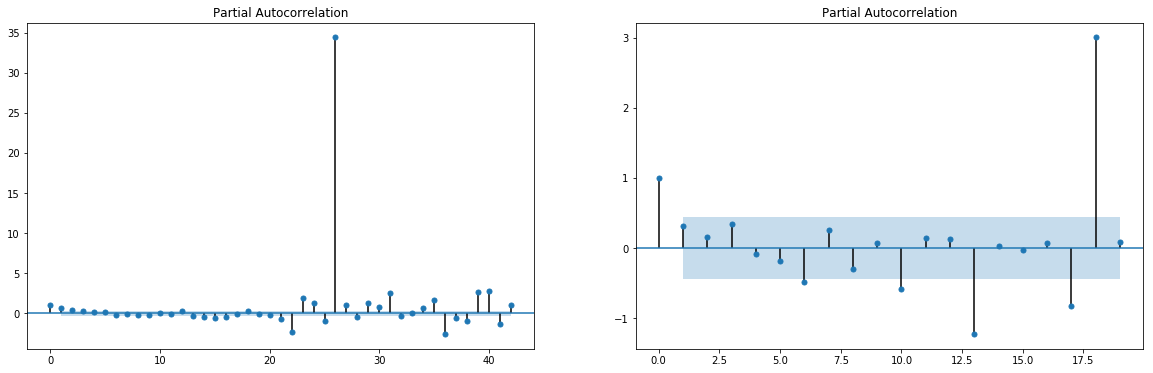

In [120]:
# 차분 전 원본 데이터
plot_acf(df_monthly['pv']) 
fig, ax = plt.subplots(1,2, figsize=(20,6))
plot_pacf(df_monthly['pv'], ax=ax[0])
plot_pacf(df_monthly['pv'][0:20], ax=ax[1]) # 앞부분만 확인 
plt.show()

### 1차 차분

In [6]:
diff = df_monthly['pv'].diff().dropna(inplace=False)
diff.head()

1   -15010977.0
2   -52225349.0
3    57378060.0
4   -46523681.0
5   -13159885.0
Name: pv, dtype: float64

In [123]:
# 1차 차분 결과  => 정상성 만족 
print( "검정통계량:" ,adfuller(diff)[0])
print( "p-value:" ,adfuller(diff)[1])
print( "사용된 시차의 수:" ,adfuller(diff)[2])
print( "자료의 수:" ,adfuller(diff)[3])
print( "1%,5%,10%수준에 해당되는 검정통계량의 값:" ,adfuller(diff)[4])

검정통계량: -5.348021663772345
p-value: 4.351374114954065e-06
사용된 시차의 수: 2
자료의 수: 39
1%,5%,10%수준에 해당되는 검정통계량의 값: {'1%': -3.610399601308181, '5%': -2.939108945868946, '10%': -2.6080629651545038}


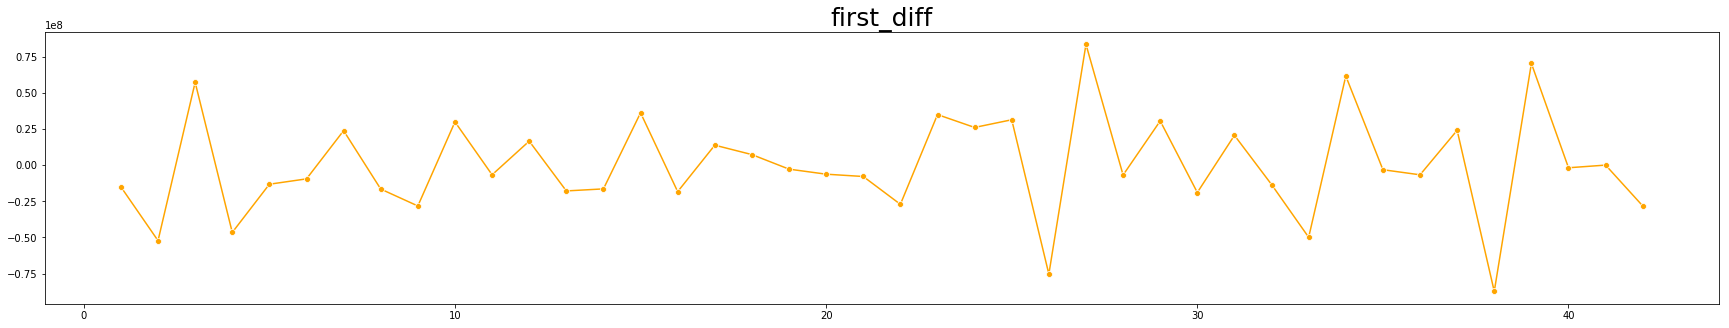

In [126]:
plt.figure(figsize = (30,5))
sns.lineplot(marker = "o",data = diff, color = 'orange')
plt.title("first_diff" , size = 25)
plt.show()

## 차분 후 ACF, PACF plot

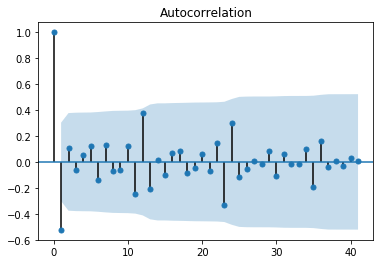

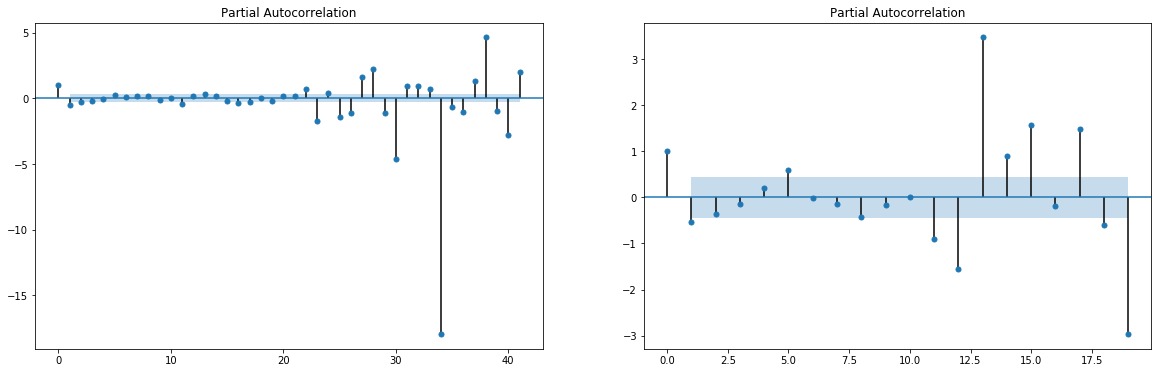

In [7]:
# 1차 차분 데이터
plot_acf(diff) 
fig, ax = plt.subplots(1,2, figsize=(20,6))
plot_pacf(diff, ax=ax[0])
plot_pacf(diff[0:20], ax=ax[1])
plt.show()

## ARIMA모형구축

In [73]:
model = ARIMA(df_monthly['pv'], order=(0,1,1))   
model_fit = model.fit(trend='c', full_output=True,disp=1)   # 'nc' = 결정론적 추세 없음. DF검정, 'c' = 상수항만 사용, 'ct' = 상수항과 1차 추세 사용
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.pv   No. Observations:                   42
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -781.670
Method:                       css-mle   S.D. of innovations       29123570.441
Date:                Mon, 09 Sep 2019   AIC                           1569.340
Time:                        16:49:30   BIC                           1574.553
Sample:                             1   HQIC                          1571.251
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.444e+05   2.04e+06     -0.071      0.944   -4.14e+06    3.85e+06
ma.L1.D.pv    -0.5948      0.112     -5.294      0.000      -0.815      -0.375
                                    Roots           

## 모델 진단

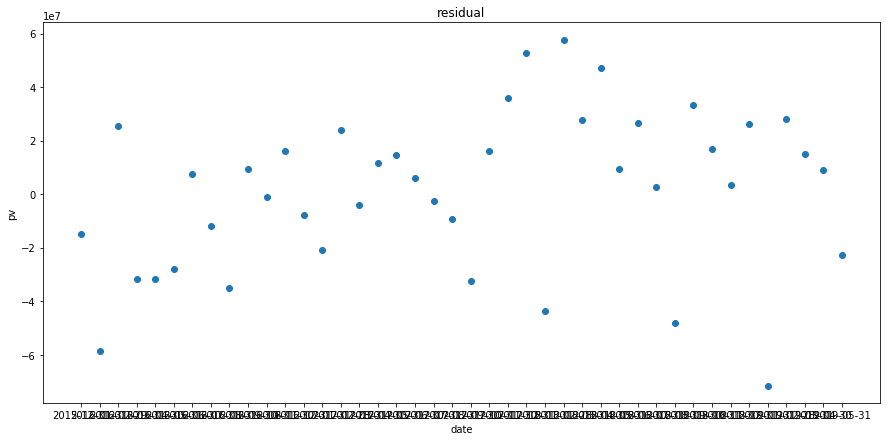

In [74]:
# 잔차 분포 확인 => 특정한 형태를 띄고있지 않음.
plt.figure(figsize=(15,7))
plt.scatter(df_monthly['date'][:-1],model_fit.resid)
plt.xlabel('date')
plt.ylabel('pv')
plt.title('residual')
plt.show()

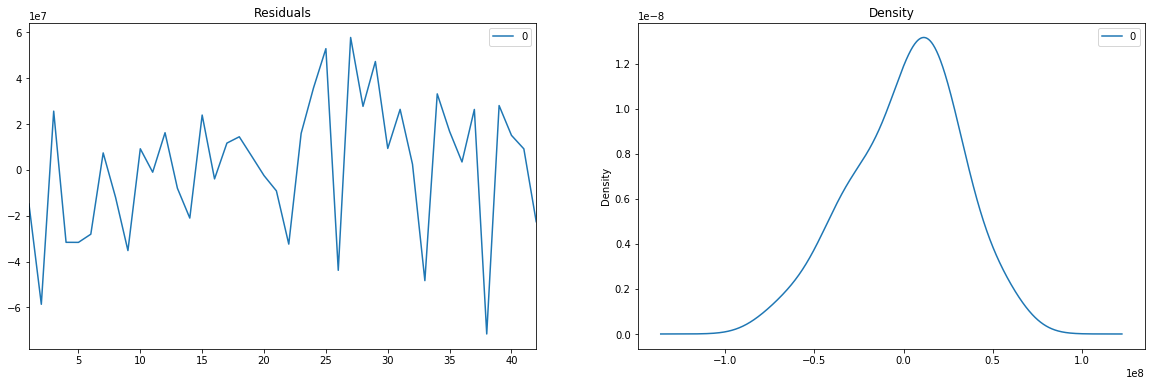

In [75]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize = (20,6))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

### Ljung-Box 검정 결과
* p-value가 모두 0.05이상이므로 자기상관이 없다고 볼 수 있다. 

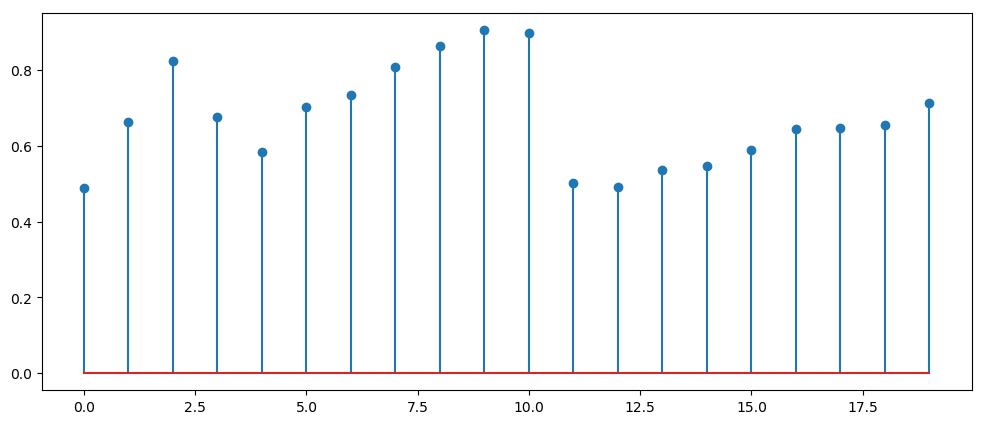

In [76]:
# Ljung-Box 검정 결과
# x 축 : 시차 , y축 : p-value
qvalue, pvalue = sm.stats.acorr_ljungbox(model_fit.resid, 20)
plt.figure(figsize=(12,5), dpi=100)
plt.stem(pvalue)
plt.show()

--------------------------
# Auto Arima Forecast

In [148]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from pmdarima.arima import auto_arima

In [51]:
model = pm.auto_arima(df_monthly['pv'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 1, 1); AIC=1570.226, BIC=1577.176, Fit time=0.081 seconds
Fit ARIMA: order=(0, 1, 0); AIC=1583.364, BIC=1586.840, Fit time=0.005 seconds
Fit ARIMA: order=(1, 1, 0); AIC=1571.859, BIC=1577.072, Fit time=0.026 seconds
Fit ARIMA: order=(0, 1, 1); AIC=1569.340, BIC=1574.553, Fit time=0.028 seconds
Fit ARIMA: order=(0, 1, 2); AIC=1569.748, BIC=1576.698, Fit time=0.065 seconds
Fit ARIMA: order=(1, 1, 2); AIC=1570.176, BIC=1578.864, Fit time=0.193 seconds
Total fit time: 0.411 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   42
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -781.670
Method:                       css-mle   S.D. of innovations       29123570.441
Date:                Mon, 09 Sep 2019   AIC                           1569.340
Time:                        14:46:21   BIC                           1574.553
Sample:               

## 모델 진단

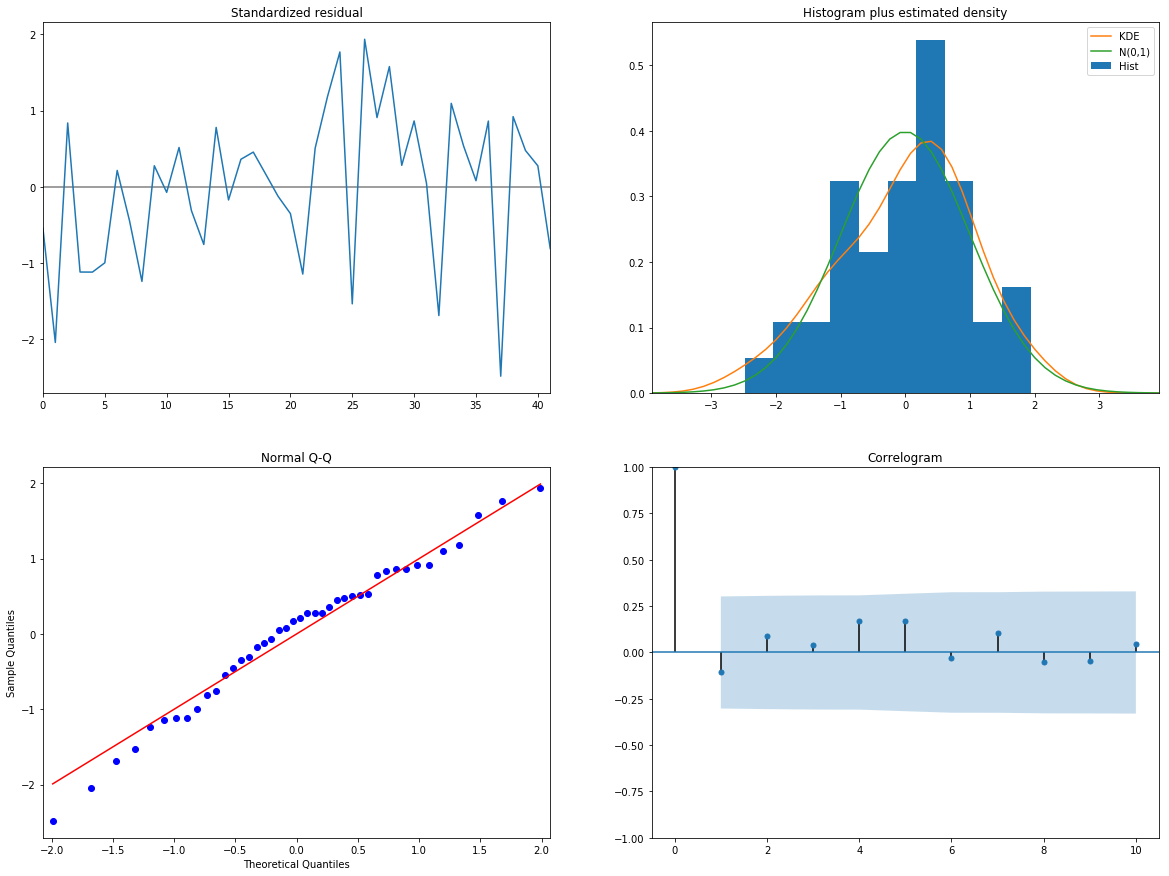

In [150]:
model.plot_diagnostics(figsize=(20,15))
plt.show()

#### 해석 
* 잔차의 평균은 0에 아까워야 함.
* 잔차의 자기상관은 없는것 같고, 히스토그램은 잔차가 살짝 치우친 것 같은 것을 보여줌. 이것은 예측 구간의 범위 확률에 영향을 줄 수 있음.
* 정규성은 잘 따르는 것으로 보임.

## [ ARIMA모형 ] out - of - time Cross Validation

In [153]:
# split data : train75: test 25 
train = df_monthly['pv'][:32] #train데이터 32개
test = df_monthly['pv'][32:] #test데이터 11개

In [154]:
print("train : ",train.shape , "test : " , test.shape)

train :  (32,) test :  (11,)


In [167]:
# Build Model
model = ARIMA(train, order=(0, 1, 1))  
fitted = model.fit(disp=-1) 

In [168]:
# Forecast
fc, se, conf = fitted.forecast(11,alpha=0.05)  # 95% conf , 11은 test data 개수

In [169]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

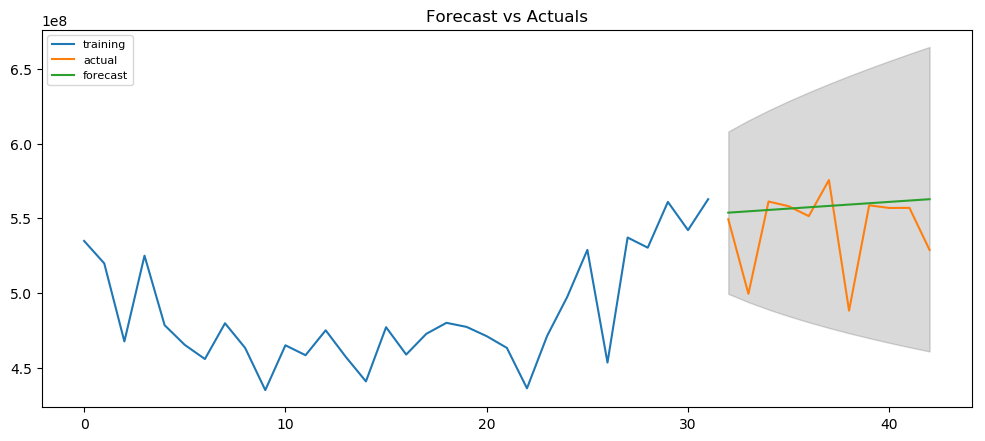

In [170]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## 모델 평가
* Mean Absolute Percentage Error (MAPE)
### $MAPE = \frac{100}{n} \sum_{t=1}^n \mid\frac{A_t - F_t}{A_t} \mid$

* Mean Error (ME)
* Mean Absolute Error (MAE)
* Mean Percentage Error (MPE)
* Root Mean Squared Error (RMSE)
* Lag 1 Autocorrelation of Error (ACF1)
* Correlation between the Actual and the Forecast (corr)
* Min-Max Error (minmax)

In [171]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':round(mape,3), 'me':round(me,3), 'mae': round(mae,3), 
            'mpe': round(mpe,3), 'rmse':round(rmse,3), 'acf1':round(acf1,3), 
            'corr':round(corr,3), 'minmax':round(minmax,3)})

forecast_accuracy(fc, test.values)


{'mape': 0.036,
 'me': 14203113.304,
 'mae': 18669691.561,
 'mpe': 0.029,
 'rmse': 29644994.726,
 'acf1': -0.401,
 'corr': 0.058,
 'minmax': 0.033}

-----------------------------------------------------
#  SARIMA 모델

In [26]:
df_monthly[['date','pv']].to_csv('monthly data_filter.csv',index=False)

In [27]:
# data형식으로 읽기 위해 parse_dates파라미터 추가해서 데이터 다시불러오기
data = pd.read_csv('monthly data_filter.csv', parse_dates=['date'], index_col='date')
data.head()

,pv
date,
2015-12-31,534839600
2016-01-31,519828623
2016-02-29,467603274
2016-03-31,524981334
2016-04-30,478457653


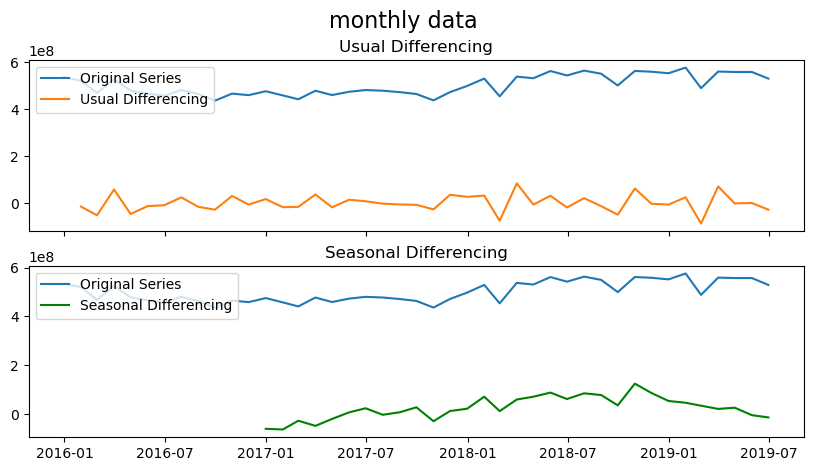

In [28]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('monthly data', fontsize=16)
plt.show()

## [ SARIMA모형 ] auto_arima

In [29]:
# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 1, 0, 12); AIC=1122.580, BIC=1125.315, Fit time=0.027 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 1, 0, 12); AIC=1128.200, BIC=1133.669, Fit time=0.390 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 1, 0, 12); AIC=1124.260, BIC=1128.362, Fit time=0.140 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 1, 0, 12); AIC=1128.358, BIC=1132.460, Fit time=0.081 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   43
Model:             SARIMAX(0, 2, 0)x(0, 1, 0, 12)   Log Likelihood                -559.290
Date:                            Mon, 09 Sep 2019   AIC                           1122.580
Time:                                    14:10:29   BIC                           1125.315
Sample:                                         0   HQIC                          1123.437
                                             - 43                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.246e+05   1.07e+07     -0.021      0.983   -2.11e+07    2.07e+07
sigma2      3.304e+15      0.010   3.28e+17      0.000     3.3e+15     3.3e+15
===================================================================================
Ljung-Box (Q):                       52.65   Jarque-Bera (JB):                 0.08
Prob(Q):                              0.00   Prob(JB):                         0.96
Heteroskedasticity (H):               1.41   Skew:                             0.11
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

## [ SARIMA 모형 ] : Out-of-Time Cross validation

In [30]:
# train, test 비율 : 75:25
train_s = data[:32]
test_s = data[32:]

In [31]:
print(train_s.shape)
print(test_s.shape)

(32, 1)
(11, 1)


In [32]:
# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel_test = pm.auto_arima(train_s, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=713.703, BIC=715.592, Fit time=0.024 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=718.881, BIC=722.659, Fit time=0.295 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=715.133, BIC=717.966, Fit time=0.164 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=717.451, BIC=720.285, Fit time=0.068 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=718.517, BIC=721.350, Fit time=0.063 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=718.681, BIC=722.459, Fit

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   43
Model:             SARIMAX(0, 2, 0)x(0, 1, 0, 12)   Log Likelihood                -559.290
Date:                            Mon, 09 Sep 2019   AIC                           1122.580
Time:                                    14:10:33   BIC                           1125.315
Sample:                                         0   HQIC                          1123.437
                                             - 43                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.246e+05   1.07e+07     -0.021      0.983   -2.11e+07    2.07e+07
sigma2      3.304e+15      0.010   3.28e+17      0.000     3.3e+15     3.3e+15
===================================================================================
Ljung-Box (Q):                       52.65   Jarque-Bera (JB):                 0.08
Prob(Q):                              0.00   Prob(JB):                         0.96
Heteroskedasticity (H):               1.41   Skew:                             0.11
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

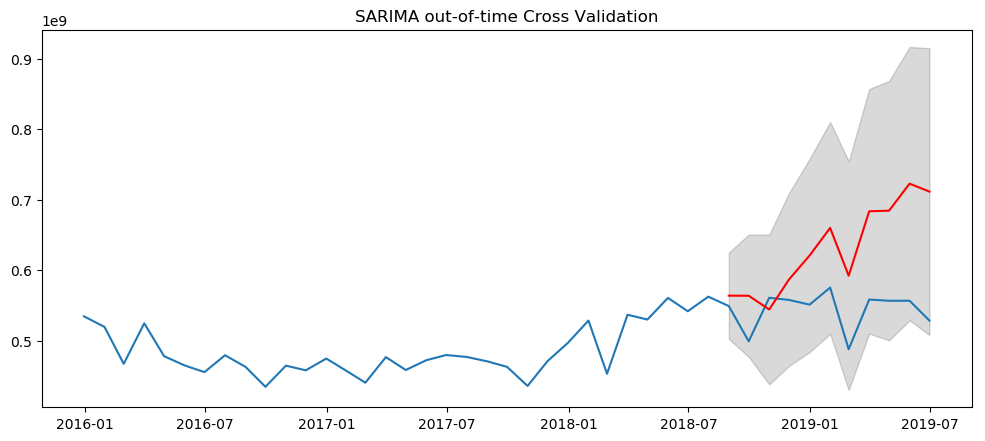

In [33]:
# Forecast
n_periods = 11   # 이 경우는 실제값과 예측값 오차 MAPE 확인하려고 기간 11로 지정한것. (test데이터 개수 : 11개)
fitted, confint = smodel_test.predict(n_periods=n_periods, return_conf_int=True)

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=test_s.index)
lower_series = pd.Series(confint[:, 0], index=test_s.index)
upper_series = pd.Series(confint[:, 1], index=test_s.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(data)
plt.plot(fitted_series, color='red')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA out-of-time Cross Validation")
plt.show()


In [185]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':round(mape,3), 'me':round(me,3), 'mae': round(mae,3), 
            'mpe': round(mpe,3), 'rmse':round(rmse,3), 'acf1':round(acf1,3), 
            'corr':round(corr,3), 'minmax':round(minmax,3)})

forecast_accuracy(fitted, test.values)


{'mape': 0.166,
 'me': 86496028.823,
 'mae': 89517699.789,
 'mpe': 0.16,
 'rmse': 104957366.515,
 'acf1': -0.401,
 'corr': 0.282,
 'minmax': 0.136}

## SARIMA 모형 진단

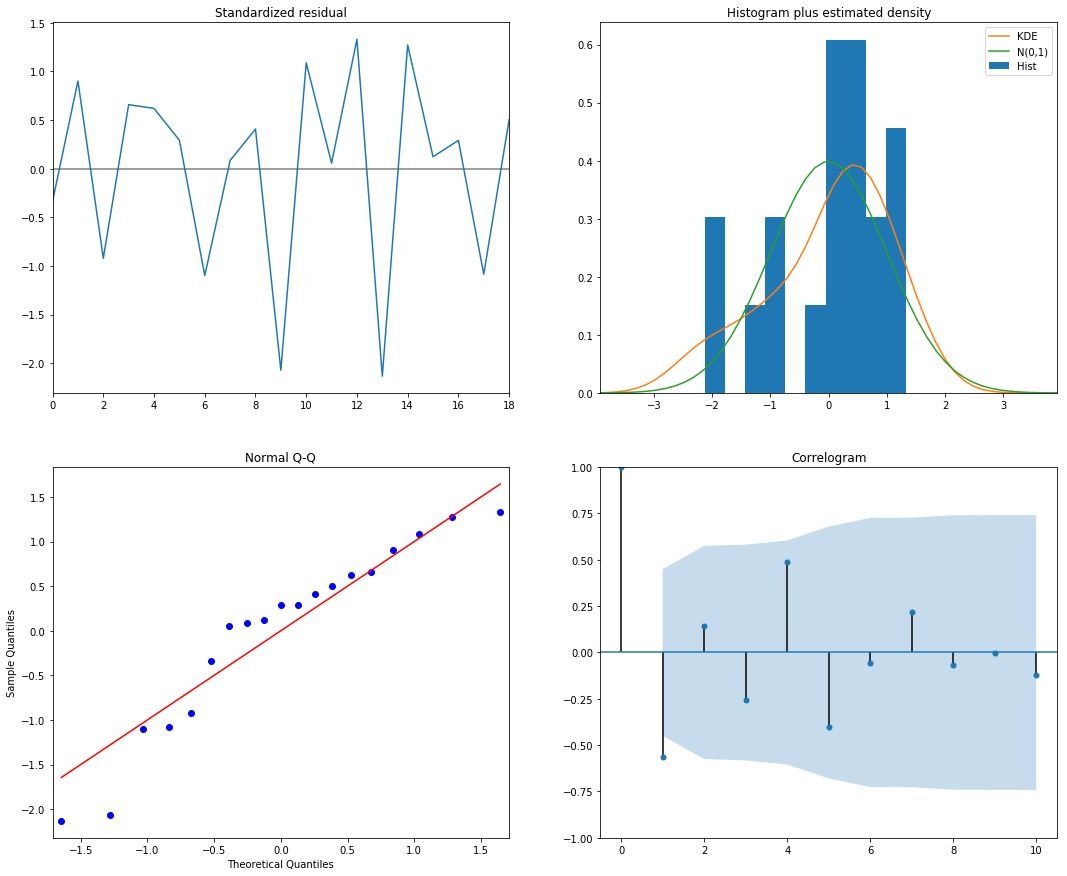

In [34]:
smodel_test.plot_diagnostics(figsize=(18,15))
plt.show()

------------------
#### [monthly] ARIMA
{'mape': 0.036, <br>
 'me': 14203113.304,<br>
 'mae': 18669691.561,<br>
 'mpe': 0.029,<br>
 'rmse': 29644994.726,<br>
 'acf1': -0.401,<br>
 'corr': 0.058,<br>
 'minmax': 0.033}

#### [monthly] SARIMA
{'mape': 0.166,<br>
 'me': 86496028.823,<br>
 'mae': 89517699.789,<br>
 'mpe': 0.16,<br>
 'rmse': 104957366.515,<br>
 'acf1': -0.401,<br>
 'corr': 0.282,<br>
 'minmax': 0.136}

#### [weekly] ARIMA
{'mape': 0.047,<br>
 'me': -1018734.466,<br>
 'mae': 5377015.228,<br>
 'mpe': -0.002,<br>
 'rmse': 8370434.328,<br>
 'acf1': -0.002,<br>
 'corr': 0.117,<br>
 'minmax': 0.042}

#### [weekly] SARIMA
{'mape': 0.13360648265101602,<br>
 'me': -13859986.1611942,<br>
 'mae': 16583593.920143478,<br>
 'mpe': -0.10378403774684293,<br>
 'rmse': 18911113.28833368,<br>
 'acf1': -0.0012628614892141558,<br>
 'corr': -0.19329936811035262,<br>
 'minmax': 0.12985875805886649}

--------------------
# 결과
### (1) ARIMA모델과 SARIMA모델 비교
* MAPE의 경우 ARIMA=0.036, SARIMA=0.166 으로 ARIMA모델이 낮고, <br>
minmax error도 ARIMA=0.033, SARIMA=0.136 으로 ARIMA모델이 나음.<br>
correlation은 ARIMA=0.058, SARIMA=0.282 로 SARIMA모델이 더 좋음.<br>
* AIC값은 SARIMA가 더 낮음.(SARIMA모델이 더 적합) 하지만 실제 예측은 ARIMA모델이 더 낫다.

### (2-1) ARIMA모델 *weekly*데이터 와 *monthly* 데이터 결과 비교
* *MAPE, Correlation, Min-Max Error* 위주로 비교했을 때, MAPE와 Min-Max Error는 monthly데이터가 더 낮고, <br>
 Correlation은 weekly 데이터에서는 0.117로 monthly데이터 0.058 보다 높음. 
 
### (2-2) SARIMA모델 *weekly*데이터 와 *monthly* 데이터 결과 비교
* *MAPE, Correlation, Min-Max Error* 위주로 비교했을 때, MAPE와 Min-Max Error는 weekly데이터가 더 낮고, <br>
 Correlation은 weekly 데이터에서는 음수값-0.193이고, monthly데이터는 양수값 0.282 임. 
 
# 결과 정리
* weekly 데이터와 monthly 데이터 모두 **ARIMA모델**이 SARIMA모델보다 예측 오차는 더 적었고, 모델적합도는 SARIMA가 더 좋았다.
* 모델진단 결과 **monthly데이터**가 weekly보다 더 적합해 보임. 

# 추후계획
* ARIMA모델로 monthly데이터 재가공하여 분석
